### Searching for patterns with clustering models

- What questions do you think are important to answer with clustering for this database?
- What have you discovered by analyzing the clusters?|

dataset: https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("disease_symptoms.csv")
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [2]:
df = df[df['Outcome Variable'] == 'Positive']
df = df.iloc[:,:-1]
label_encoder = LabelEncoder()
cat_columns = df.select_dtypes(['object']).columns
data = df.copy()
for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])
    
features = data.iloc[:,1:]
labels = data.iloc[:,0]
data

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,36,1,0,1,1,19,0,1,2
3,3,1,1,0,1,25,1,2,2
4,3,1,1,0,1,25,1,2,2
5,24,1,0,0,0,25,0,2,2
6,36,1,1,1,1,25,0,2,2
...,...,...,...,...,...,...,...,...,...
344,65,1,0,1,0,80,0,0,0
345,65,1,0,1,0,85,1,0,0
346,65,1,0,1,0,85,1,0,0
347,65,1,0,1,0,90,0,0,0


In [3]:
labels.max() # Sabemos que contamos con 77 enfermedades

76

# K-means
We'll use k-means to find the optimal number of clusters.

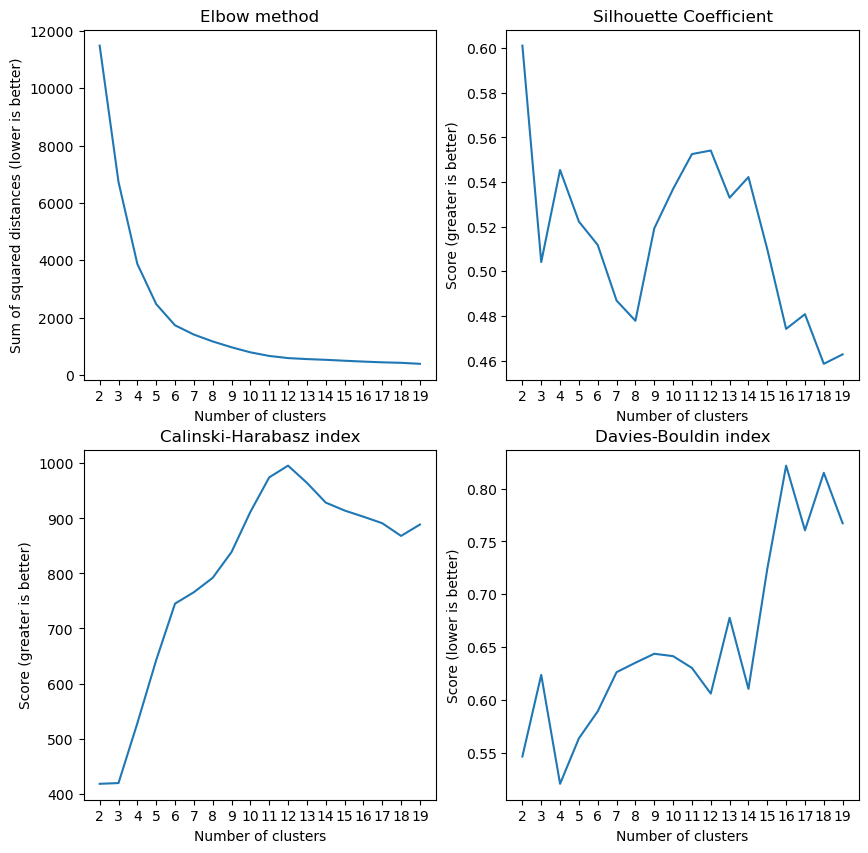

In [4]:
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 20) # Possible number of clusters
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(features)
    sum_of_squared_distances.append(kmeans.inertia_)
    sscore.append(silhouette_score(features, kmeans.labels_))
    chscore.append(calinski_harabasz_score(features, kmeans.labels_))
    dbscore.append(davies_bouldin_score(features, kmeans.labels_))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')    
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks);

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')    
axs[0][1].set_title('Silhouette Coefficient')    
axs[0][1].set_xticks(ks);

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')    
axs[1][0].set_title('Calinski-Harabasz index')    
axs[1][0].set_xticks(ks);

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')    
axs[1][1].set_title('Davies-Bouldin index')    
axs[1][1].set_xticks(ks);


We can observe that a favored number of optimal clusters is 4

In [5]:
print('---- K means --------')
kmeans = KMeans(n_clusters=4).fit(features)
clustering_labels = kmeans.labels_
df['clustering_labels'] = clustering_labels
grouped_data = df.groupby('clustering_labels')
   
dis = list(df['Disease'].unique())
groups= {}
for disease in dis:
    best = -1
    count= 0
    for group_label, group_data in grouped_data:
        i = list(group_data['Disease']).count(disease)
        if i>count:
            count=i
            best=group_label
    if best in groups:
        groups[best].append(disease)
    else:
        groups[best] = [disease]
        
groups    

---- K means --------


{0: ['Influenza',
  'Eczema',
  'Depression',
  'Liver Cancer',
  'Urinary Tract Infection',
  'Bipolar Disorder',
  'Bronchitis',
  'Cerebral Palsy',
  'Colorectal Cancer',
  'Hypertensive Heart Disease',
  'Myocardial Infarction (Heart...',
  'Urinary Tract Infection (UTI)',
  'Common Cold',
  'Migraine',
  'Cirrhosis',
  'Conjunctivitis (Pink Eye)',
  'Hyperthyroidism',
  'Kidney Cancer',
  'Liver Disease',
  'Malaria',
  'Pancreatitis',
  'Rheumatoid Arthritis',
  'Spina Bifida',
  'Ulcerative Colitis'],
 2: ['Asthma',
  'Multiple Sclerosis',
  'Pneumonia',
  'Gastroenteritis',
  'Anxiety Disorders',
  'Diabetes',
  'Osteoarthritis',
  'Klinefelter Syndrome',
  'Chickenpox',
  'Eating Disorders (Anorexia,...',
  'Fibromyalgia',
  'Hypoglycemia',
  'Lymphoma',
  'Psoriasis',
  'Tuberculosis',
  'Hypothyroidism',
  'Allergic Rhinitis',
  'Cataracts',
  "Crohn's Disease",
  'Pneumocystis Pneumonia (PCP)',
  'Scoliosis',
  'Sickle Cell Anemia',
  'Tetanus',
  'Down Syndrome',
  'Ebola 

Group 0 includes a variety of diseases, such as asthma, multiple sclerosis, pneumonia, diabetes, and kidney disease. These diseases span several body systems and conditions, suggesting that group 0 may represent a general category of common and widespread health problems.

Group 1 consists of diseases such as kidney cancer, coronary artery disease, hypertension, and Parkinson's disease. These diseases are mainly related to chronic and age-related conditions, indicating that cluster 1 may represent a group of diseases associated with aging and specific organ systems such as the cardiovascular and nervous systems.

Cluster 2 includes diseases such as influenza, depression, bipolar disorder and rheumatoid arthritis. This cluster encompasses diseases related to immune system dysfunctions, mental disorders and inflammatory conditions. This suggests that cluster 2 may represent a group of diseases with underlying immune and inflammatory mechanisms.

Cluster 3 contains a single disease, stroke. This could indicate that the clustering algorithm identified a distinct group representing stroke, which may have unique characteristics or risk factors compared to the other diseases in the dataset.

Using principal component analysis we can reduce the characteristics of each observation and observe a graphical representation of the clusters found.

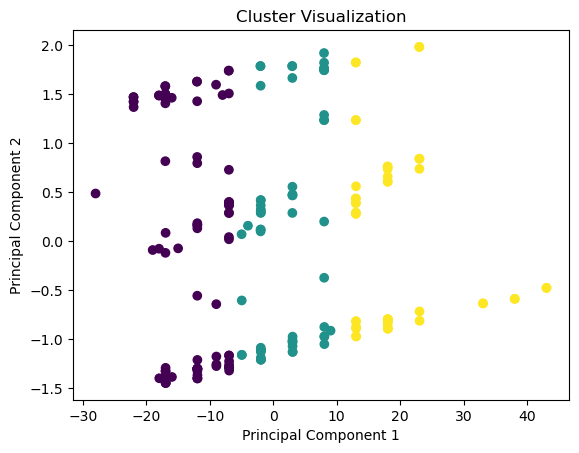

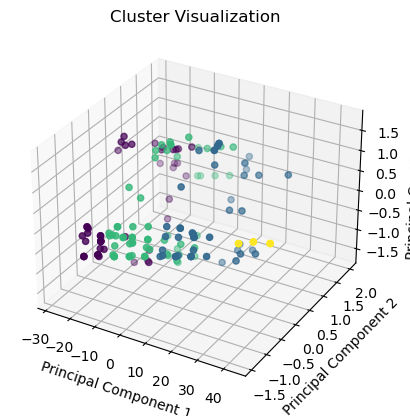

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Apply clustering algorithm (e.g., KMeans)
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(features)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.show()

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

kmeans = KMeans(n_clusters=4)
labels2 = kmeans.fit_predict(features)
# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=labels2)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Cluster Visualization')
plt.show()


# DBScan
To find the hyperparameter epsilon in dbscan we'll use k nearest neigbors.

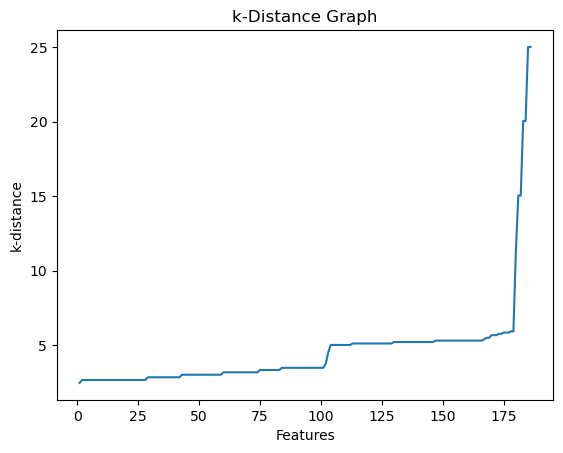

In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
# Calculate k-distance graph
neigh = NearestNeighbors(n_neighbors=k+1)
neighbors = neigh.fit(features)
distances, _ = neighbors.kneighbors(features)
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(range(1, len(k_distances) + 1), k_distances)
plt.xlabel("Features")
plt.ylabel("k-distance")
plt.title("k-Distance Graph")
plt.show()

Based on the k-distances provided, we can observe a sudden increase in the k-distance axis from around 3 to 5-6, an epsilon value of 3 could be a reasonable choice for DBSCAN. The transition point in the k-distance plot occurs around this value, suggesting a change in point density (features). Setting epsilon to 3 would mean that points within 3 units of each other would be considered neighbors.

In [8]:
print('----- DBSCAN -----')
dbscan = DBSCAN(eps=3).fit(features)
clustering_labels = dbscan.labels_
df['clustering_labels'] = clustering_labels
grouped_data = df.groupby('clustering_labels')
   
dis = list(df['Disease'].unique())
groups= {}
for disease in dis:
    best = -1
    count= 0
    for group_label, group_data in grouped_data:
        i = list(group_data['Disease']).count(disease)
        if i>count:
            count=i
            best=group_label
    if best in groups:
        groups[best].append(disease)
    else:
        groups[best] = [disease]
        
groups    

----- DBSCAN -----


{0: ['Influenza', 'Eczema'],
 2: ['Asthma',
  'Depression',
  'Multiple Sclerosis',
  'Migraine',
  'Pneumonia',
  'Cirrhosis',
  'Conjunctivitis (Pink Eye)',
  'Gastroenteritis',
  'Hyperthyroidism',
  'Kidney Cancer',
  'Liver Disease',
  'Malaria',
  'Pancreatitis',
  'Rheumatoid Arthritis',
  'Spina Bifida',
  'Ulcerative Colitis',
  'Anxiety Disorders',
  'Diabetes',
  'Osteoarthritis',
  'Klinefelter Syndrome',
  'Chickenpox',
  'Eating Disorders (Anorexia,...',
  'Fibromyalgia',
  'Hemophilia',
  'Hypoglycemia',
  'Lymphoma',
  'Psoriasis',
  'Tuberculosis',
  'Hypothyroidism',
  'Kidney Disease',
  'Allergic Rhinitis',
  'Cataracts',
  "Crohn's Disease",
  'Pneumocystis Pneumonia (PCP)',
  'Scoliosis',
  'Sickle Cell Anemia',
  'Tetanus'],
 1: ['Liver Cancer',
  'Urinary Tract Infection',
  'Bipolar Disorder',
  'Bronchitis',
  'Cerebral Palsy',
  'Colorectal Cancer',
  'Hypertensive Heart Disease',
  'Myocardial Infarction (Heart...',
  'Urinary Tract Infection (UTI)',
  'Comm

- Cluster 0: ['Influenza', 'Eczema'].

This cluster consists of diseases related to infections and skin conditions.
Group 1: ['Liver cancer', 'Urinary tract infection', 'Bipolar disorder', 'Bronchitis', 'Cerebral palsy', 'Colorectal cancer', 'Hypertensive heart disease', 'Myocardial infarction (heart...)', 'Urinary tract infection (UTI)', 'Common cold'].

This cluster includes diseases related to various body systems, such as cancer, infections, cardiovascular and neurological disorders.

- Cluster 4: ['Coronary artery disease', 'Osteoporosis', 'Hemorrhoids', 'Polycystic ovary syndrome (PCOS)', 'Systemic lupus erythematosus', 'Typhoid fever'].

This group consists of diseases related to different body systems, including cardiovascular, musculoskeletal and immune conditions.
- Cluster 5: ['Hypertension', 'Chronic kidney disease', 'Hepatitis B', 'Parkinson's disease', 'Prader-Willi syndrome', 'Thyroid cancer'].

This cluster includes diseases related to hypertension, renal disease, viral infections, neurological and endocrine disorders.
- Cluster 3: ['Down syndrome', 'Ebola virus', 'Lyme disease', 'Pancreatic cancer', 'Pneumothorax'].

This cluster consists of diseases with diverse causes, such as genetic disorders (Down syndrome), infectious diseases (Ebola virus, Lyme disease) and cancer (pancreatic cancer).
- Cluster 6: ["Alzheimer's disease", "Chronic obstructive pulmonary disease (COPD)", "Dementia", "Diverticulitis", "Lung cancer", "Mumps"].

This cluster includes diseases related to neurological disorders (Alzheimer's Disease, Dementia), respiratory conditions (COPD, Lung Cancer) and infections (Mumps).
- Cluster 7: ['Gout', 'Testicular cancer', 'Tonsillitis', 'Williams syndrome'].

This cluster consists of diseases with different causes, such as metabolic disorders (gout), cancer (testicular cancer), infectious conditions (tonsillitis) and genetic disorders (Williams syndrome).
These patterns indicate that the clusters are grouped according to similarities in disease categories, body systems and causes.

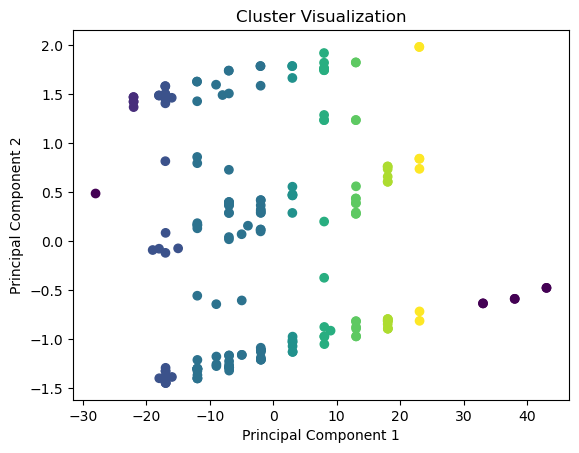

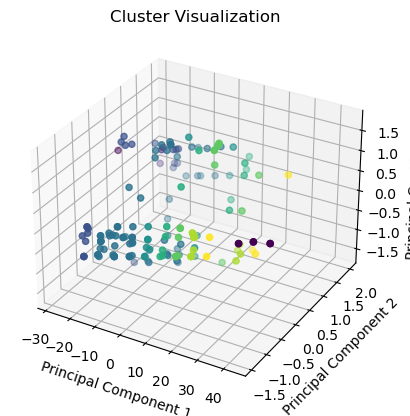

In [9]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Apply clustering algorithm
dbscan = DBSCAN(eps=3).fit(features)
labels = dbscan.labels_

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.show()

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

dbscan = DBSCAN(eps=3).fit(features)
labels2 = dbscan.labels_
# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=labels2)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Cluster Visualization')
plt.show()

# Gaussian Mixture

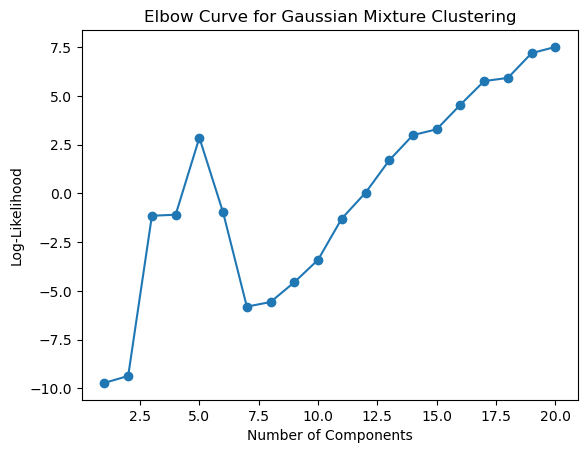

In [10]:
from sklearn.mixture import GaussianMixture

# Generate a range of number of components to try
n_components = range(1, 21)

# Fit Gaussian Mixture models for different number of components
models = [GaussianMixture(n, random_state=0).fit(features) for n in n_components]

# Calculate the log-likelihood for each model
log_likelihoods = [model.score(features) for model in models]

# Plot the elbow curve
plt.plot(n_components, log_likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.title('Elbow Curve for Gaussian Mixture Clustering')
plt.show()

We can see that the log likelihood starts to decrease rapidly from 5 components, so we will use that amount.

In [11]:
print('---- Gaussian Mixture --------')
gauss = GaussianMixture(n_components=5).fit(features)
clustering_labels = gauss.predict(features)
df['clustering_labels'] = clustering_labels
grouped_data = df.groupby('clustering_labels')

dis = list(df['Disease'].unique())
groups= {}
for disease in dis:
    best = -1
    count= 0
    for group_label, group_data in grouped_data:
        i = list(group_data['Disease']).count(disease)
        if i>count:
            count=i
            best=group_label
    if best in groups:
        groups[best].append(disease)
    else:
        groups[best] = [disease]
        
groups    

---- Gaussian Mixture --------


{0: ['Influenza',
  'Asthma',
  'Eczema',
  'Liver Cancer',
  'Urinary Tract Infection',
  'Bronchitis',
  'Multiple Sclerosis',
  'Myocardial Infarction (Heart...',
  'Urinary Tract Infection (UTI)',
  'Migraine',
  'Hyperthyroidism',
  'Malaria',
  'Osteoarthritis',
  'Tuberculosis',
  'Hypothyroidism',
  'Kidney Disease',
  "Crohn's Disease",
  'Pneumocystis Pneumonia (PCP)',
  'Ebola Virus',
  'Polycystic Ovary Syndrome (PCOS)',
  'Lung Cancer',
  'Tonsillitis'],
 1: ['Depression',
  'Bipolar Disorder',
  'Colorectal Cancer',
  'Hypertensive Heart Disease',
  'Cirrhosis',
  'Conjunctivitis (Pink Eye)',
  'Kidney Cancer',
  'Liver Disease',
  'Pancreatitis',
  'Rheumatoid Arthritis',
  'Ulcerative Colitis',
  'Anxiety Disorders',
  'Diabetes',
  'Eating Disorders (Anorexia,...',
  'Fibromyalgia',
  'Hypoglycemia',
  'Psoriasis',
  'Allergic Rhinitis',
  'Cataracts',
  'Hypertension',
  'Osteoporosis',
  'Scoliosis',
  'Tetanus',
  'Down Syndrome',
  'Lyme Disease',
  'Pancreatic Can

Cluster 2:

This cluster includes several diseases such as influenza, asthma, eczema and migraine, mainly related to respiratory and skin problems.
It also contains diseases such as Tuberculosis and Ebola Virus, indicating the inclusion of infectious diseases.
Some chronic diseases such as hypothyroidism, Crohn's disease and polycystic ovary syndrome (PCOS) are also present in this group.
Overall, this group appears to have a mix of respiratory, skin-related, infectious and chronic diseases.

Group 3:

This group consists of various mental health-related illnesses, such as depression, bipolar disorder and anxiety disorders.
It also includes diseases such as rheumatoid arthritis, ulcerative colitis and psoriasis, related to autoimmune and inflammatory disorders.
Some cardiovascular conditions such as hypertensive heart disease and cirrhosis are present in this group.
In addition, it contains several types of cancer, such as colorectal cancer, pancreatic cancer and kidney cancer.
This group appears to have a combination of mental disorders, autoimmune/inflammatory diseases and certain types of cancer.

Group 4:

This cluster consists of a single health disorder, stroke. It represents a distinct cluster containing only this specific disease.

Cluster 0:

This cluster includes a wide range of diseases, such as urinary tract infections, common cold, sickle cell anemia, and Alzheimer's disease.
It also includes chronic diseases such as coronary artery disease, hemophilia and chronic obstructive pulmonary disease (COPD).
Some types of cancer, such as lung and testicular cancer, are also present in this group.
Conditions in this group appear to encompass a wide range of health problems, such as infections, chronic diseases, and specific types of cancer.

Group 1:

This group consists mainly of infectious diseases such as pneumonia and gastroenteritis.
It also includes Pneumothorax, which is a lung-related condition.
In addition, it contains Cerebral Palsy, which is a neurological disorder.
This cluster appears to focus on infectious diseases and includes a neurological disorder.

In general, the groups show patterns based on the types of diseases they contain. Cluster 2 contains a mix of respiratory, skin, infectious and chronic diseases. Cluster 3 contains mainly mental disorders, autoimmune/inflammatory diseases and certain types of cancer. Group 4 represents a single disease, stroke. Group 0 includes a wide range of diseases, such as infections, chronic diseases and certain types of cancer. Group 1 focuses on infectious diseases and includes a neurological disorder.



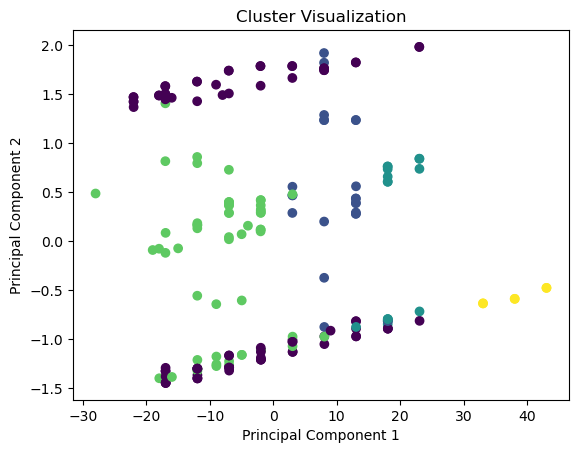

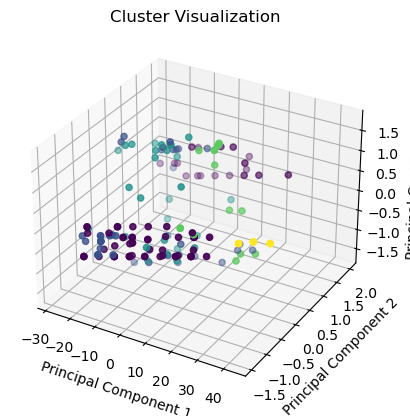

In [12]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Apply clustering algorithm
gauss = GaussianMixture(n_components=5).fit(features)
labels = gauss.predict(features)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.show()

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

gauss = GaussianMixture(n_components=5).fit(features)
labels2 = gauss.predict(features)
# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=labels2)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Cluster Visualization')
plt.show()